In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import mplcursors

# Scatter plot for MTTAE

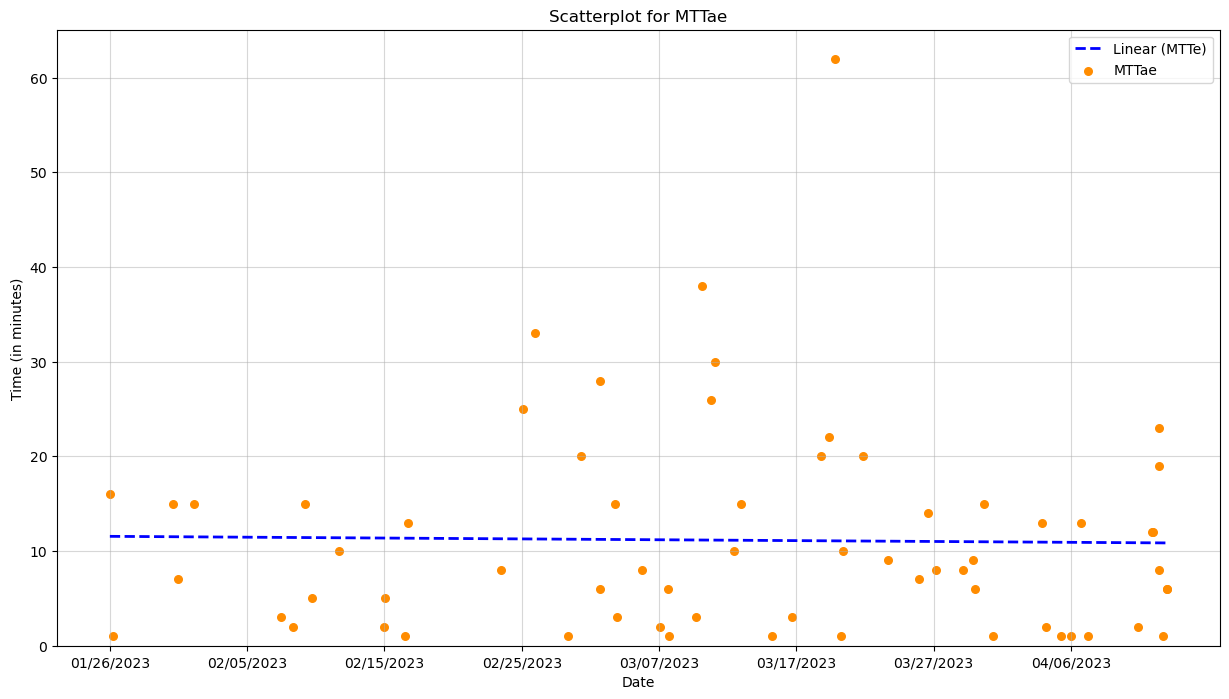

<Figure size 640x480 with 0 Axes>

In [4]:
# read csv file into a pandas DataFrame
df = pd.read_excel('ScatterPlot_ttea.xlsx')
# convert date column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])
last_90_days = df['DateTime']>= (dt.datetime.now()-dt.timedelta(days=90))
df = df.loc[last_90_days]
# set figure size
plt.figure(figsize=(15, 8))
# add trendline
z = np.polyfit(df['DateTime'].astype('int64')//(10**9), df['TTAES'], 1)
p = np.poly1d(z)
plt.plot(df['DateTime'], p(df['DateTime'].astype('int64')//(10**9)), color="blue", linestyle='--', linewidth=2, label='Linear (MTTe)')
# create scatterplot
plt.scatter(df['DateTime'], df['TTAES'], s=30, c='darkorange', label='MTTae')
# set x-axis format
locator = mdates.DayLocator(interval=10)
formatter = mdates.DateFormatter('%m/%d/%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
# set x-axis and y-axis to be symmetrical
plt.axis('equal')
plt.gca().set_aspect('auto', adjustable='box')
x_ticks = np.arange(df['DateTime'].min(), df['DateTime'].max(), np.timedelta64(10, 'D'))
plt.xticks(x_ticks)
# set y axis limits
plt.ylim(bottom=0)
# set plot title and labels
plt.title('Scatterplot for MTTae')
plt.xlabel('Date')
plt.ylabel('Time (in minutes)')
# add legend
plt.legend(loc='upper right')
# add grid
plt.grid(True, alpha=0.5)
# display plot
plt.show()
# save figure
plt.savefig('scatterplot.png', dpi=300, bbox_inches='tight')